In [6]:
import pandas as pd

# Laad de S&P 500 en CPI datasets
sp500_data = pd.read_csv('sp500_data.csv')
cpi_data = pd.read_csv('cpi_data.csv')

# Converteer de 'Date' kolom naar datetime-formaat
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
cpi_data['DATE'] = pd.to_datetime(cpi_data['DATE'])

print(sp500_data.head())
print(cpi_data.head())


        Date         Open         High          Low        Close    Adj Close  \
0 2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
1 2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2 2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
3 2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
4 2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

       Volume  
0   931800000  
1  1009000000  
2  1085500000  
3  1092300000  
4  1225200000  
        DATE  CPIAUCSL
0 2000-01-01     169.3
1 2000-02-01     170.0
2 2000-03-01     171.0
3 2000-04-01     170.9
4 2000-05-01     171.2


## data transformatie

In [7]:
# Voeg een 'Year-Month' kolom toe aan de S&P 500 dataset
sp500_data['Year-Month'] = sp500_data['Date'].dt.to_period('M')

# Voeg de maand-CPI-data toe aan de S&P 500 dataset
sp500_data = pd.merge(sp500_data, cpi_data, left_on='Year-Month', right_on=cpi_data['DATE'].dt.to_period('M'), how='left')

# Bekijk de gecombineerde data
print(sp500_data.head())



        Date         Open         High          Low        Close    Adj Close  \
0 2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
1 2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2 2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
3 2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
4 2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

       Volume Year-Month       DATE  CPIAUCSL  
0   931800000    2000-01 2000-01-01     169.3  
1  1009000000    2000-01 2000-01-01     169.3  
2  1085500000    2000-01 2000-01-01     169.3  
3  1092300000    2000-01 2000-01-01     169.3  
4  1225200000    2000-01 2000-01-01     169.3  


In [8]:
# Verwijder rijen met ontbrekende waarden
sp500_data = sp500_data.dropna(subset=['CPIAUCSL'])

# Controleer of er nog ontbrekende waarden zijn
print(sp500_data.isnull().sum())

# Gebruik 'Adj Close' als de slotkoers
sp500_data['Adj Close'] = sp500_data['Adj Close'].astype(float)

# Bekijk de opgeschoonde data
print(sp500_data.head())



Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Year-Month    0
DATE          0
CPIAUCSL      0
dtype: int64
        Date         Open         High          Low        Close    Adj Close  \
0 2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
1 2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2 2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
3 2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
4 2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

       Volume Year-Month       DATE  CPIAUCSL  
0   931800000    2000-01 2000-01-01     169.3  
1  1009000000    2000-01 2000-01-01     169.3  
2  1085500000    2000-01 2000-01-01     169.3  
3  1092300000    2000-01 2000-01-01     169.3  
4  1225200000    2000-01 2000-01-01     169.3  


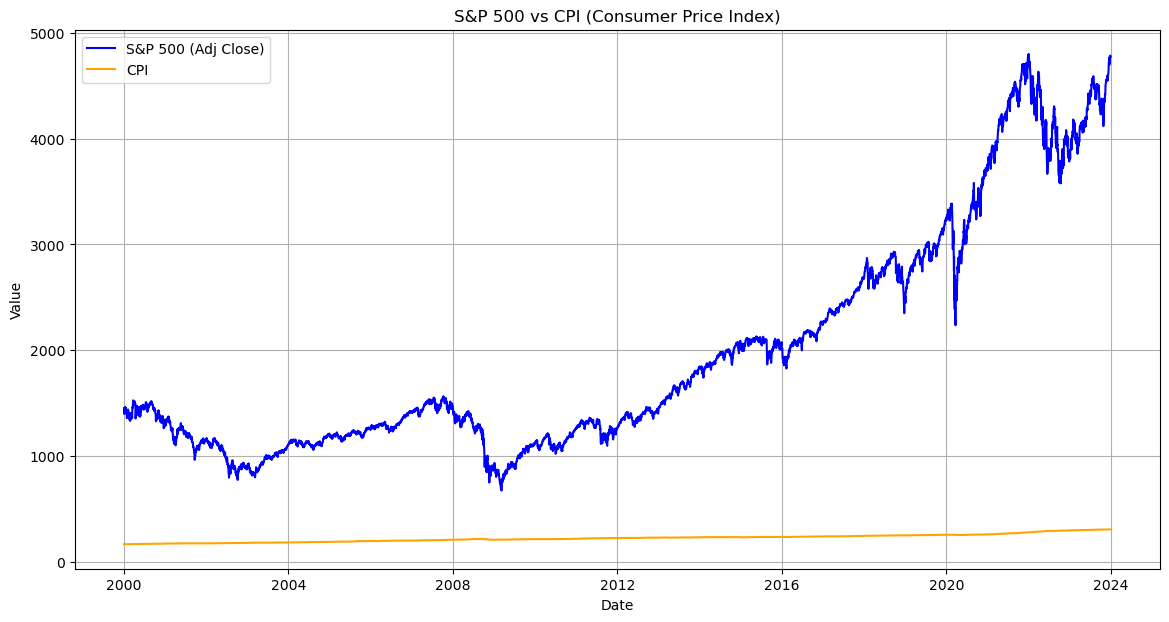

In [9]:
import matplotlib.pyplot as plt

# Visualiseer de S&P 500 'Adj Close' en CPI samen
plt.figure(figsize=(14, 7))
plt.plot(sp500_data['Date'], sp500_data['Adj Close'], label='S&P 500 (Adj Close)', color='blue')
plt.plot(sp500_data['Date'], sp500_data['CPIAUCSL'], label='CPI', color='orange')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('S&P 500 vs CPI (Consumer Price Index)')
plt.legend()
plt.grid(True)
plt.show()
